In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

w[0]: 0.393906  b: -0.031804


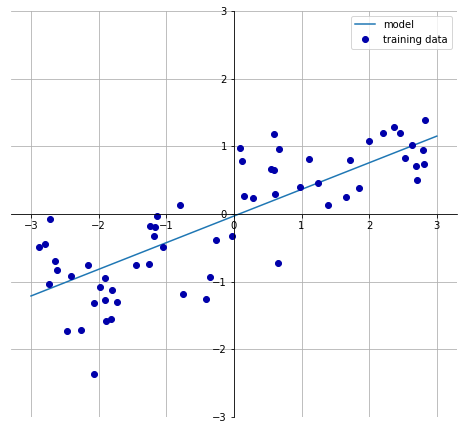

In [2]:
mglearn.plots.plot_linear_regression_wave()

### LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [6]:
lr = LinearRegression().fit(X_train,y_train)

“斜率”参数（w,也叫做权重或**系数**）被保存在coef_属性中，而偏移或截距（b）被保存在intercept_属性中  
在scikit-learn中总是将从训练数据中得到的值保存在下划线结尾的属性中，为了将其与用户设置的数据分开

In [7]:
print("lr.coef_{}".format(lr.coef_))
print("lr.intercept_{}".format(lr.intercept_))

lr.coef_[0.39390555]
lr.intercept_-0.031804343026759746


intercept_属性是一个浮点数，而coef_属性是一个Numpy数组，每个元素对应一个输入特征。  
wave数据集只有一个输入特征

In [8]:
print("Train set score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

Train set score : 0.67
Test set score : 0.66


训练集和测试集上的score非常接近，说明可能存在欠拟合
- 对于一维数据来说，过拟合风险很小，因为模型非常简单（或者受限）
- 对于更高维的数据集（即有大量特征的数据集），线性模型将会变得更加强大，过拟合的可能性也会变大。

## 波士顿房价数据集
506个样本，105个导出特征

In [9]:
X,y=mglearn.datasets.load_extended_boston()

In [10]:
X.shape

(506, 104)

In [11]:
y.shape

(506,)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
lr = LinearRegression().fit(X_train,y_train)

In [14]:
print("Train set score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

Train set score : 0.94
Test set score : 0.86


训练集和测试集之间的性能差异是过拟合的明显标志，过拟合，过分依赖训练数据，应该找一个可以控制复杂度的模型。标准线性回归最常用的替代方法就是**岭回归**

### Ridge

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge().fit(X_train,y_train)

In [17]:
print("Training set score : {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test,y_test)))

Training set score : 0.86
Test set score : 0.84


Ridge在训练集上的分数要低于在LinearRegression，但是在测试集上的分数更高。  
线性回归对数据存在过拟合。  
Ridge是一种约束更强的模型，所以不容易出现过拟合。  
复杂度更小的模型意味在训练集上性能更差，**但泛化性能更好**。  
<br/>
简单性和训练集性能二者对于模型的重要程度可以通过设置alpha参数来指定。默认alpha=1.0。  
增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能。
**更大的alpha表示约束更强的模型**

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score : {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score : 0.76
Test set score : 0.74


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score : {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge01.score(X_test,y_test)))
#alpha很小，得到一个与LinearRegression类似的模型

Training set score : 0.90
Test set score : 0.88


可以查看alpha去不同值时候的coef_属性，从而更加定性的理解alpha是如何改变模型的。

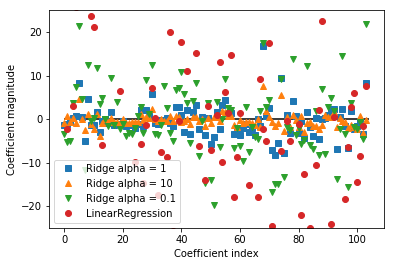

In [20]:
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha = 10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha = 0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
#更大的alpha表示约束更强的模型，预计大alpha对应的coef_元素比小alpha对应的coef_元素小

In [21]:
ridge.coef_

array([-1.41962664e+00, -1.21199878e+00, -6.13512819e-01,  3.37203039e-01,
        7.18358257e-01,  8.37034844e+00,  5.56155426e-01, -5.04317645e+00,
        4.61862103e+00, -1.29007061e+00, -1.39405791e+00,  1.71634088e+00,
       -2.88453830e+00, -3.93156151e-01,  3.60796428e-03, -8.77396903e-01,
        1.54340432e+00, -1.27765458e+00, -1.07199724e+00, -1.21712487e+00,
       -3.28377416e-01, -1.65680557e+00, -1.42671225e+00, -1.31930638e+00,
       -2.00617365e+00, -1.21620733e+00,  2.00848662e+00, -1.57032899e+00,
        2.07810090e+00,  5.97652400e-01,  5.67707007e+00, -9.56056651e-01,
       -1.09200640e+00, -1.25945781e-01, -4.73676033e-01,  2.26490977e-01,
       -8.96373122e-01, -1.68063566e+00,  2.71943302e+00,  2.87395761e+00,
        9.46038532e-01, -2.92762965e+00,  2.00364469e+00, -3.37613597e+00,
        1.56827371e+00,  3.18788424e+00, -2.18664362e+00,  4.69142964e-01,
       -3.68067185e+00,  3.37203039e-01, -5.70178381e+00, -4.05241076e+00,
        1.61481788e+00, -

x=0,对应的第一个特征系数，x=1对应的第二个特征系数，y轴表示该系数具体的数值。  
还有一种方法可以用来理解正则化的影响，就是固定alpha的值，但改变训练数据量。  
<br/>
将模型性能作为数据集大小的函数进行绘图，这样的图像叫做**学习曲线**。

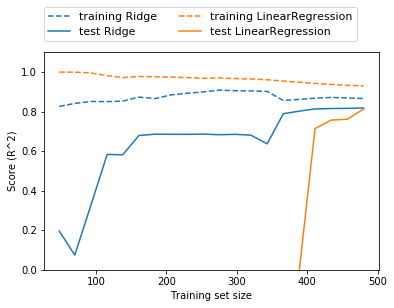

In [22]:
mglearn.plots.plot_ridge_n_samples()

### Lasso：另一种正则化的线性回归

In [23]:
import mglearn
from sklearn.linear_model import Lasso

In [24]:
X,y = mglearn.datasets.load_extended_boston()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
lasso = Lasso().fit(X_train,y_train)

In [27]:
print("Training test score : {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used : {}".format(np.sum(lasso.coef_!=0)))

Training test score : 0.20
Test set score : 0.20
Number of feature used : 4


在训练集和测试集上都表现的很差，表示存在欠拟合，105个特征只用了4个。  
Lasso也有一个正则化的参数alpha，可以控制系数趋向于0的强度。  
**max_iter：运行迭代的次数**

In [28]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

In [29]:
print("Training set score : {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used : {}".format(np.sum(lasso001.coef_!=0)))

Training set score : 0.86
Test set score : 0.88
Number of features used : 33


如果把alpha设置的太小，那么就会消除正则化的效果，并出现过拟合，得到LinearRegression类似的效果

In [30]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score : {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used : {}".format(np.sum(lasso00001.coef_!=0)))

Training set score : 0.93
Test set score : 0.89
Number of features used : 94


Text(0, 0.5, 'Coefficient magnitude')

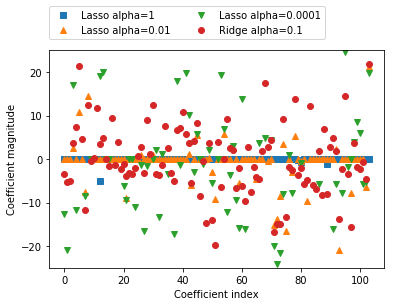

In [31]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

alpha=1的时候，大部分系数都是0，而且其他系数也很小  
alpha减小到0.01，大部分特征都是0  
alpha=0.0001时，得到一个正则化很弱的模型，大部分系数都不为0  
Ridge的alpha为0.1时，Lasso的alpha为0.01时，模型类似，但是Ridge模型的所有系数都不为0  
<br/>
在两个模型中，一般首选岭回归，如果特征很多，你认为只有其中几个是重要的，就选择Lasso
Lasso可以给出更容易解释的模型，因为它只选择了一部分输入特征。

### LogisticRegression  逻辑回归 
### LinearSVC 线性支持向量机

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [33]:
X,y = mglearn.datasets.make_forge()

D:\Anaconda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


D:\Anaconda\envs\py36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


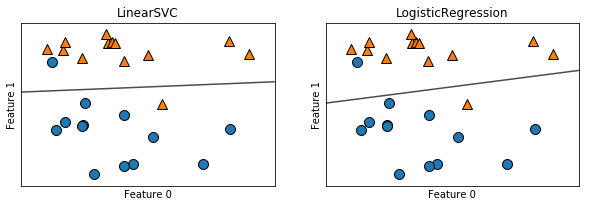

In [34]:
fig,axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

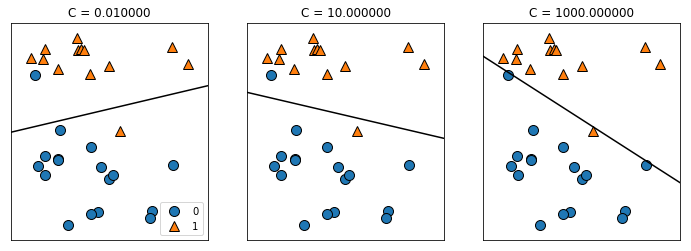

In [35]:
mglearn.plots.plot_linear_svc_regularization()

在高维空间中，用于分类的线性模型变得非常强大，当考虑更多的特征时，避免过拟合，变得越来越重要。

In [36]:
from sklearn.datasets import load_breast_cancer

In [37]:
cancer = load_breast_cancer()

In [38]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
#stratify=cancer.target 保证分配的比例
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [40]:
logreg = LogisticRegression().fit(X_train,y_train)

D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
print("Training set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test,y_test)))

Training set score : 0.955
Test set score : 0.958


In [42]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score : 0.972
Test set score : 0.965


D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score : 0.934
Test set score : 0.930


D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=1默认，给出了相当好的性能，但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。  
C=100，可以得到更高的训练精度，也得到了稍高的测试集精度，更复杂的模型应该性能更好。  
C=0.01,将已经欠拟合的模型一直向左移动。

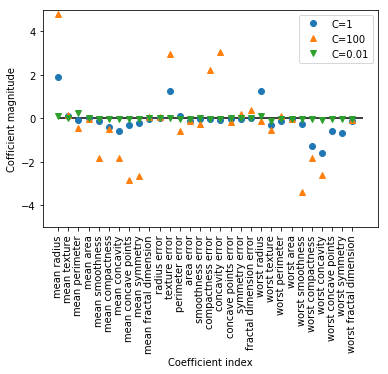

In [44]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Cofficient magnitude")
plt.legend()

D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001:0.92


D:\Anaconda\envs\py36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000:0.96
Test accuracy of l1 logreg with C=1.000:0.96
Training accuracy of l1 logreg with C=100.000:0.99
Test accuracy of l1 logreg with C=100.000:0.98


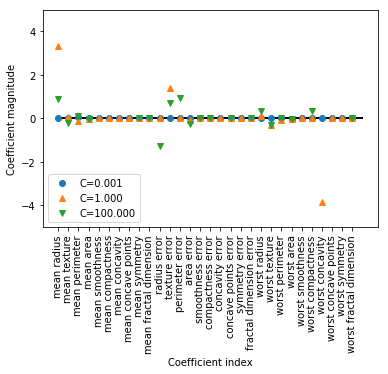

In [45]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
    plt.hlines(0,0,cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5,5)
    plt.legend(loc=3)